Problem set in Applied Statistics 2020
=====
Kian Gao &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SHP593
-----

---

The philosophy of some problems is discussed with my group members Alicia, Timo and Jonas, meanwhile the code is completely written **on my own**.


In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import scipy.stats as stats
from sympy import *
import sys
sys.path.append('../External_Functions')
from ExternalFunctions import *
from scipy import special as spe
%matplotlib notebook

r = np.random
r.seed(1)

**I – Distributions and probabilities:**

**1.1** (4 points) Assuming the “El Clasico” football match is an even game (p = 0.5), what is the
probability, that the score after 144 non-draw league games is exactly even?

---

To make it even, the number of both team's victories should be the same. Thus, we can use binomial distribution to actually calculate the probability.

$$P_x = C_n^xp^{x}{(1-p)}^{n-x}$$

In [691]:
n_match = 144
x_match = n_match // 2
p_match = 0.5

p_match_even = spe.comb(n_match, x_match) * (p_match**x_match) * ((1-p_match) ** (n_match - x_match)) 
print('The probability of even in Barcelona verses RM is: ', p_match_even)
print('If using the scipy library, the answer is:            ', stats.binom.pmf(x_match, n_match, p_match))  # Compare to library value

The probability of even in Barcelona verses RM is:  0.06637504645119732
If using the scipy library, the answer is:             0.06637504645119337


**1.2** (4 points) Brad Pitt and Edward Norton are shooting golf balls at a window with $p_{hit} = 0.054$ chance of hitting. How many golf balls do they need to be 90% sure of hitting the window?

To hit the window with $p_{hit} = 90\%$, we need to make sure that the former shoots don't hit, means that $p_{nohit} = 10\%$. 

In [3]:
p_chance_nohit = 1 - 0.054
p_nohit = p_chance_nohit
for n_shoot in range(50):
    p_nohit *= p_chance_nohit
    if p_nohit <= 0.1:
        break
print('The number of golf balls they use to make sure the probability over 90% is:', n_shoot)

The number of golf balls they use to make sure the probability over 90% is: 40


**II – Error propagation:**
**2.1** (10 points) The Hubble constant h has been measured by seven independent experiments: 73.5±1.4,
74.0 ± 1.4, 73.3 ± 1.8, 75.0 ± 2.0, 67.6 ± 0.7, 70.4 ± 1.4, and 67.66 ± 0.42 in (km/s)/Mpc.
* What is the weighted average of h? Do the values agree with each other?
* The first four measurements are based on a different method than the last three. Do the
  values from the same method agree with each other?
  
---

Answer: 

1.The weighted mean is defined as $$\hat{\mu} = \frac{\sum{x_i}/\sigma^2_i}{\sum 1 / \sigma^2_i}$$

In [4]:
h_uncertainty2 = np.array([1.4 ** 2, 1.4 ** 2, 1.8 ** 2, 2.0 ** 2, 0.7 ** 2, 1.4 ** 2, 0.42 ** 2]) 
h_value = np.array([73.5, 74, 73.3, 75, 67.6, 70.4, 67.66])
h_weighted_avg = np.sum(h_value / h_uncertainty2) / np.sum(1 / h_uncertainty2)
print(h_weighted_avg)

68.78925107187163


And the values don't agree with each other. The weighted mean is roughly 68.79, but we can easily see that the second and the fourth measurements need more than $3\sigma$ distance to touch the weighted average. 

Meanwhile, we can do a chi2 test for the constant.

In [5]:
def chi2_mean_cal(y, ey, sy):
    chi2 = np.sum(((y - ey) / sy)**2)  
    return chi2

Ndof_h = len(h_value) - 1
Chi2_h = chi2_mean_cal(h_value, h_weighted_avg, h_uncertainty2)
Prob_chi2_h = stats.chi2.sf(Chi2_h, Ndof_h)  

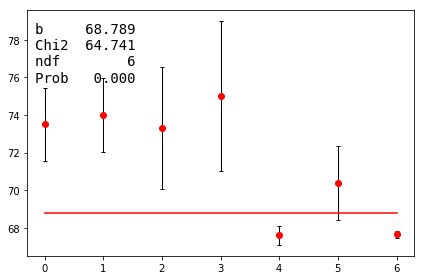

In [22]:
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(np.linspace(0,6,7), h_value, h_uncertainty2, fmt='ro', ecolor='k', elinewidth=1, capsize=2, capthick=1)
ax.plot(np.linspace(0,6,7), np.repeat(h_weighted_avg, 7), '-r')

d = {'b': h_weighted_avg,
     'Chi2':     Chi2_h,
     'ndf':      Ndof_h,
     'Prob':     Prob_chi2_h,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.95, text, ax, fontsize=14)
fig.tight_layout()

From the Chi2 regression test and numerical estimation, we can safely say that the values don't agree with each other

In [7]:
h_weighted_avg4 = np.sum(h_value[:4] / h_uncertainty2[:4]) / np.sum(1 / h_uncertainty2[:4])
Ndof_h4 = 4 - 1
Chi2_h4 = chi2_mean_cal(h_value[:4], h_weighted_avg4, h_uncertainty2[:4])
Prob_chi2_h4 = stats.chi2.sf(Chi2_h4, Ndof_h4)
print('The Chi2 probability of the first four values are:  ', Prob_chi2_h4)

The Chi2 probability of the first four values are:   0.9852357656317927


In [8]:
h_weighted_avg3 = np.sum(h_value[4:7] / h_uncertainty2[4:7]) / np.sum(1 / h_uncertainty2[4:7])
Ndof_h3 = 3 - 1
Chi2_h3 = chi2_mean_cal(h_value[4:7], h_weighted_avg3, h_uncertainty2[4:7])
Prob_chi2_h3 = stats.chi2.sf(Chi2_h3, Ndof_h3)
print('The Chi2 probability of the last three values are:  ', Prob_chi2_h3)

The Chi2 probability of the last three values are:   0.2584838114720961


Therefore, through the Chi2 test we could safely say that the first four values and the last three values agree each other within their own methods.

**2.2** (10 points) Using Coulomb’s law you want to measure a charge, $q_0 = F d^2/k_eQ$. Assume that
Coulomb’s constant $ke = 8.99 \cdot 10^9 Nm^2/C^2$ and the instrument charge $Q = 10^{−9} C$ are known.
* Given force F = 0.87 ± 0.08 N and distance d = 0.0045 ± 0.0003 m, what is q0?
* Where does the largest contribution to the uncertainty on q0 come from? F or d?
* If you could measure F and d with uncertainties ± 0.01 N and ± 0.0001 m, respectively, at
what distance should you expect to measure the charge in question q0 most precisely?

In [73]:
def charge_cal(F, d):
    return F * d ** 2 / (8.99 * 1e9 * 1e-9) 

q0 = charge_cal(0.87, 0.0045)
dq0_df = charge_cal(1, 0.0045)
dq0_dd = charge_cal(2 * 0.87, np.sqrt(0.0045))
q0_unc = np.sqrt(dq0_df ** 2 * 0.08 ** 2 + dq0_dd ** 2 * 0.0003 ** 2)
print('q0 is ', "%.3g" % q0, '+/-', "%.3g" % q0_unc, "C")

q0 is  1.96e-06 +/- 3.17e-07 C


In [70]:
print('The uncertainty contribution on F is', np.sqrt(dq0_df ** 2 * 0.08 ** 2))
print('The uncertainty contribution on d is', np.sqrt(dq0_dd ** 2 * 0.0003 ** 2))
print('Therefore the contribution mostly comes from d')

The uncertainty on F is 1.802002224694104e-07
The uncertainty on d is 2.6129032258064514e-07
Therefore the contribution mostly comes from d


Fill the uncertainty of F and d with 0.01 and 0.0001: $$\sigma_{q0} = \sqrt{[(\frac{d^2}{k_eQ})^2 \cdot 0.01^2 + (\frac{2Fd}{k_eQ})^2 \cdot 0.0001^2]}$$ Then plug in $F = q_0k_eQ/d^2$:$$\sigma_{q0} = \sqrt{\frac{d^4}{(k_eQ)^2} \cdot 0.01^2 + \frac{4\cdot q_0^2}{d^2}\cdot 0.0001^2}$$Take the derivatives: $$\sigma_q^2{'} = \frac{4d^3}{k_e^2Q^2}\cdot (10^{-2})^{2} - \frac{8\cdot q_0^2}{d^3}\cdot (10^{-4})^2$$

[0.00629279]
The optimal distance is  0.00629279504319142 m
In order to check, we can make a plot
Before 0.00629  m, the derivatives are all negative. Perfect


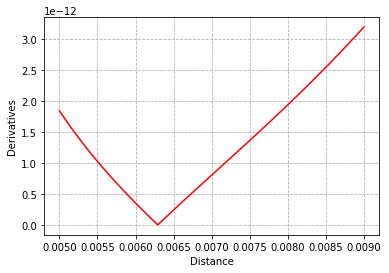

In [186]:
def q_unc_derivative(d):
    return 4 * d ** 3 * 1e-4 / (8.99 ** 2) - 8 * (1.96 * 1e-6) ** 2 * 1e-8 / (d ** 3)

def q_unc(d):
    return d ** 4 * 1e-4 / (8.99 ** 2) + 4 * ((1.96 * 1e-6) ** 2) * 1e-8 / (d ** 2)

print(opt.minimize(q_unc, 0.6, tol=1e-16).x)
d_best = opt.newton(q_unc_derivative, 1)
print('The optimal distance is ',  d_best, 'm')
print('In order to check, we can make a plot')
plt.plot(np.linspace(5e-3, 9e-3,10000), abs(q_unc_derivative(np.linspace(5e-3, 9e-3,10000))), c='r')
plt.ylabel('Derivatives')
plt.xlabel('Distance')
plt.grid(linestyle='--')
print('Before 0.00629  m, the derivatives are all negative. Perfect')

**2.3** (12 points) Sub-saharan humans tend not to have any Neanderthal DNA, while all others have a
few percent. The file: www.nbi.dk/∼petersen/data DNAfraction.txt contains the fraction
of Neanderthal DNA for 2318 Danish high school students.
* Plot the distribution of Neanderthal DNA fraction, and calculate the mean and RMS.
* Do you find any mismeasurements or outliers from the main population in the data?
* Fit the main population data with distributions of your choice, and comment on the fits.

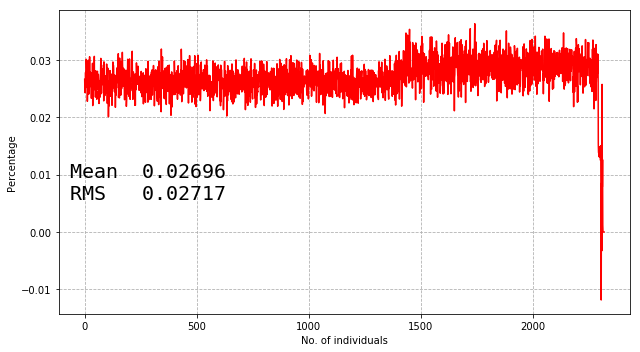

In [41]:
dna_data = np.loadtxt('data_DNAfraction.txt')
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(np.linspace(0, len(dna_data), len(dna_data)), dna_data, c='r')
ax.set_xlabel('No. of individuals')
ax.set_ylabel('Percentage')
ax.grid(linestyle='--')
dna_mean = np.average(dna_data)
dna_rms = np.sqrt(np.average(dna_data ** 2))
dna_std = np.std(dna_data)
d = {'Mean':dna_mean,
    'RMS':dna_rms}
text = nice_string_output(d, extra_spacing=2, decimals=5)
add_text_to_ax(0.02, 0.5, text, ax, fontsize=20)
fig.tight_layout()

In [104]:
print('The outlier numbers are: ', np.argwhere(dna_data<=(np.average(dna_data))-3*np.std(dna_data)).flatten(), '\nWhere they get the percentage deviatea away from 3 sigma(std)\n\n')
print('Meanwhile, the mismeasurements (also includes in outliers) are:', np.argwhere(dna_data<0).flatten(), '\nWhere the percentage is smaller than 0, physically not acceptable')

The outlier number is:  [2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2309 2310 2311 2312 2313 2314 2315 2316 2317] 
Where they get the percentage deviatea away from 3 sigma(std)


Meanwhile, the mismeasurements (also includes) are: [2303 2304 2307] 
Where the percentage is smaller than 0, physically not acceptable


First we move the outlier out, where they exist in 3 sigma out from average
The distribution chose is Gaussian 

We create the histogram of dna_data, where array[0] is bin data's number, [1] is bins' position
The original chi2 is:  3185.835458738805
The dof is:  61
92.7224680401674 0.026955491659177957


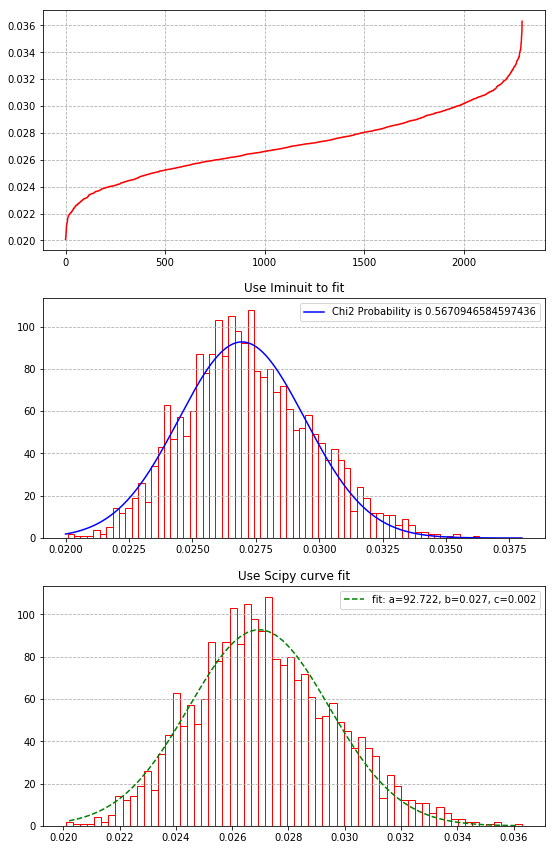

In [519]:
from iminuit import Minuit

print('First we move the outlier out, where they exist in 3 sigma out from average')
dna_ndata = np.delete(dna_data, np.argwhere(dna_data<=(np.average(dna_data))-3*np.std(dna_data)).flatten())
dna_ndata = sorted(dna_ndata)
fig, axs = plt.subplots(3, figsize=(9,15))
axs[0].plot(np.linspace(0,len(dna_ndata),len(dna_ndata)), dna_ndata, c='r')
axs[0].grid(linestyle='--')
print('The distribution chose is Gaussian ')
axs[1].hist(dna_ndata, 64, fill=False, edgecolor='red')
axs[1].grid(linestyle='--', axis='y')

dna_hist = np.histogram(dna_ndata, 64)
print('\nWe create the histogram of dna_data, where array[0] is bin data\'s number, [1] is bins\' position')

def gaussian_fit(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
# Minimize the gaussian fit through Chi2 

N_dna_var = 3
N_dna_dof = 64 - N_dna_var

chi2_dna_object = Chi2Regression(gaussian_fit, (dna_hist[1][:-1]+dna_hist[1][1:])/2, dna_hist[0])

# def chi2_dna_object(a, x0, sigma):
#     y_fit = gaussian_fit((dna_hist[1][:-1]+dna_hist[1][1:])/2, a, x0, sigma)
#     chi2 = np.sum(((dna_hist[0] - y_fit) / np.average(dna_ndata))**2)
#     return chi2

dna_minuit = Minuit(chi2_dna_object, pedantic=False, a=10, x0=0.03, sigma=0.027)
dna_minuit.migrad()
chi2_dna_minuit = dna_minuit.fval
print('The original chi2 is: ', chi2_dna_minuit)
print('The dof is: ', N_dna_dof)

a_dna_fit = dna_minuit.values['a']
x0_dna_fit = dna_minuit.values['x0']
sigma_dna_fit = dna_minuit.values['sigma']

x_dna_fit = np.linspace(0.02, 0.038, 1000)
gaussian_dna_fit = gaussian_fit(x_dna_fit,a_dna_fit, x0_dna_fit,sigma_dna_fit)
print(a_dna_fit, x0_dna_fit)

axs[1].plot(x_dna_fit, gaussian_dna_fit, c='b',label='Chi2 Probability is '+str(stats.chi2.sf(chi2_dna_minuit, 3200)))
axs[1].legend()
axs[1].set_title('Use Iminuit to fit')


#---------------------------------------------

popt, pcov = opt.curve_fit(gaussian_fit, (dna_hist[1][:-1]+dna_hist[1][1:])/2, dna_hist[0])
axs[2].plot((dna_hist[1][:-1]+dna_hist[1][1:])/2, gaussian_fit((dna_hist[1][:-1]+dna_hist[1][1:])/2, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
axs[2].hist(dna_ndata, 64, fill=False, edgecolor='red')
axs[2].grid(linestyle='--', axis='y')
axs[2].set_title('Use Scipy curve fit')
axs[2].legend()
plt.show()

The gaussian fit with Chi2 probability is ~56%, pretty neat.

**III – Monte Carlo:**
**3.1** (15 points) Assume that the outcome of an experiment can be described by first drawing a random
number x from the distribution f(x) = C(c1 + x
c2 ) for x ∈ [1, 10], where c1 = 5 and c2 = 2 and
then using this x value to calculate y = x exp(−x).
* What is the value of C? And what is the mean and RMS of f(x)?
* What method(s) can be used to produce random numbers according to f(x)? Why?
* Produce 5000 random pairs (x, y) and calculate the correlation(s) between the (x, y) values.
* Fit the distribution of the produced x values to f(x), with c1 and c2 as free parameters.
* How many measurements of x would you need, in order to determine c1 and c2, respectively, with a precision better than 1% of their values?


In [706]:
r = np.random
r.seed(24)
from scipy import integrate
# The distribution should be normalized so integrate f(x) we get C equals to 1/144
def f_distribution(x):
    return (1/378)*(5+x**2)

def f_dis_rev(u):
    return (u / (1/378) - 5) ** (-2)

f_mean = integrate.quad(f_distribution, 1, 10)[0]/9
print('The mean value of f(x) is ',np.around(f_mean, 5))
print('The RMS is ', (np.sqrt(integrate.quad(lambda x:((1/378)*(5+x*2))**2, 1, 10)[0] / 9)))

The mean value of f(x) is  0.11111
The RMS is  0.0445042429662982


Firstly, we use uniform random number generator to produce an array, then insert this random array to the distribution to get the array with specific probability.

The correlation coefficient is : -0.002050252869011107
Therefore, x and y are highly positive correlation


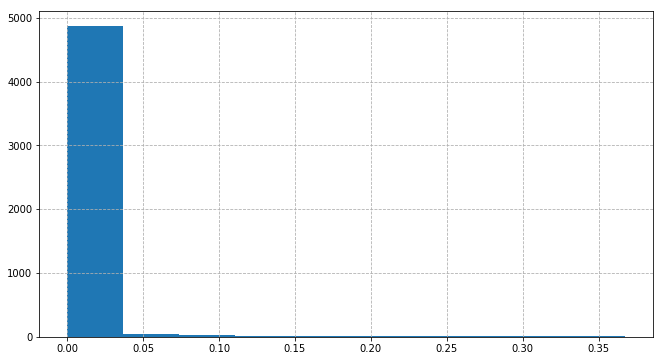

In [710]:
def y_cal(x):
    return x * np.exp(-x)

uni_random_x = r.uniform(1, 10, 5000)
x_dis = f_distribution(uni_random_x)
x_after = f_dis_rev(r.uniform(0, 1, 5000))
y_after = y_cal(x_after)
print('The correlation coefficient is :', np.corrcoef(x_after,y_after)[0, 1])
print('Therefore, x and y are highly positive correlation')
plt.figure(figsize=(11, 6))
# plt.scatter(x_dis, y_after, s=0.5, c='r')
plt.hist(y_after)
plt.grid(linestyle='--')
plt.show()

In [715]:
def dis_fit(x, c1, c2):
    return (1/378) * (c1 + x ** c2)

dis_chi2_obj = Chi2Regression(dis_fit, uni_random_x, x_dis)
dis_minuit = Minuit(dis_chi2_obj, pedantic=False, c1=4, c2=4)
dis_minuit.migrad()
chi2_dis_minuit = dis_minuit.fval

c1_dis_fit = dis_minuit.values['c1']
c2_dis_fit = dis_minuit.values['c2']
print('c1 fit is: ', c1_dis_fit, 'c2 fit is: ', c2_dis_fit)
print('P chi2 is ', stats.chi2.sf(chi2_dis_minuit, len(x_dis)-2))

c1 fit is:  5.001470065341365 c2 fit is:  2.0000320222444565
P chi2 is  1.0


**IV – Statistical tests:**
**4.1** (15 points) The length (l in µm) and transparency (T) of two types of cells (P and E) can be
found for 4690 cells in the file: www.nbi.dk/∼petersen/data Cells.txt.
* Selecting P-cells by requiring l < 9 µm what is the rate of type I and type II errors?
* Which of the two variables l and T is best at distinguishing between P and E cells?
* Separate P and E cells using l and/or T, and draw a ROC curve of your result.


The total num of P cells smaller than 9 um is : 2502
The E cells num is : 269
The total num of E cells greater than 9 um is : 1847
The P cells num is : 72
Therefore, type I error rate is:  2.7972%
The type II error rate is:  12.7127%

The type I error rate of transparency of 0.6 is:  0.03535353535353535
Type II is:  0.15359168241965973
Therefore, numerically, length is a better distinguishing variable


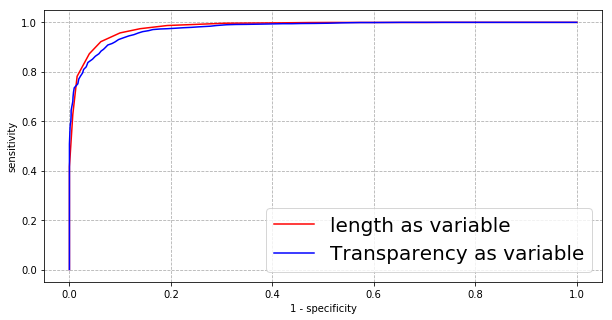

In [412]:
cell_data = np.loadtxt('data_Cells.txt')
print('The total num of P cells smaller than 9 um is :', np.count_nonzero(cell_data[np.argwhere(cell_data[:,1]<9).flatten()][:,0]==0))
print('The E cells num is :',np.count_nonzero(cell_data[np.argwhere(cell_data[:,1]<9.0)][:,0]==1))
print('The total num of E cells greater than 9 um is :', np.count_nonzero(cell_data[np.argwhere(cell_data[:,1]>=9).flatten()][:,0]==1))
print('The P cells num is :',np.count_nonzero(cell_data[np.argwhere(cell_data[:,1]>=9.0)][:,0]==0))
print('Therefore, type I error rate is: ', "{:.4%}".format(72/(2502+72)))
print('The type II error rate is: ', "{:.4%}".format(269/(1847+269)))

P_total=2502+72
E_total=1847+269
P_false_transpa = np.count_nonzero(cell_data[np.argwhere(cell_data[:,2]>=0.6).flatten()][:,0]==0)
E_false_transpa = np.count_nonzero(cell_data[np.argwhere(cell_data[:,2]<0.6).flatten()][:,0]==1)
print('\nThe type I error rate of transparency of 0.6 is: ', P_false_transpa/P_total)
print('Type II is: ', E_false_transpa/E_total)
print('Therefore, numerically, length is a better distinguishing variable')

length_test = np.linspace(np.min(cell_data[:][:,1]+0.0001), np.max(cell_data[:][:,1]), 100)
fp_arr = np.ones_like(length_test)
tp_arr = np.ones_like(length_test)
count = 0

for l in length_test:
    tp_rate = np.count_nonzero(cell_data[np.argwhere(cell_data[:,1]<l)][:,0]==0) / P_total
    fp_rate = np.count_nonzero(cell_data[np.argwhere(cell_data[:,1]>l)][:,0]==1) / E_total
    tp_arr[count] = tp_rate
    fp_arr[count] = fp_rate
    count +=1

plt.figure(figsize=(10,5))
plt.plot(1-fp_arr, tp_arr, c='r', label='length as variable')
plt.grid(linestyle='--')
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

count = 0
trans_test = np.linspace(np.min(cell_data[:][:,2]+0.0001), np.max(cell_data[:][:,2]), 100)
for l in trans_test:
    tp_rate = np.count_nonzero(cell_data[np.argwhere(cell_data[:,2]<l)][:,0]==0) / P_total
    fp_rate = np.count_nonzero(cell_data[np.argwhere(cell_data[:,2]>l)][:,0]==1) / E_total
    tp_arr[count] = tp_rate
    fp_arr[count] = fp_rate
    count +=1
    
plt.plot(1-fp_arr, tp_arr, c='b', label='Transparency as variable')
plt.legend(prop={'size': 20})

plt.show()

**V – Fitting data:**

**5.1** (15 points) Kepler’s third law states that “the square of the
orbital period (T) of a planet is directly proportional to
the cube of the semi-major axis (a) of its orbit”.
The table lists values for T in days (known very precisely) and a in AU (= 149597870700 m) at the time of the
first measurement (in 1778) of the gravitational constant
$G_{1778} = (7.5 ± 1.0) × 10^{−11}m^3kg^{−1}s^{−2}.$

<ErrorbarContainer object of 3 artists>

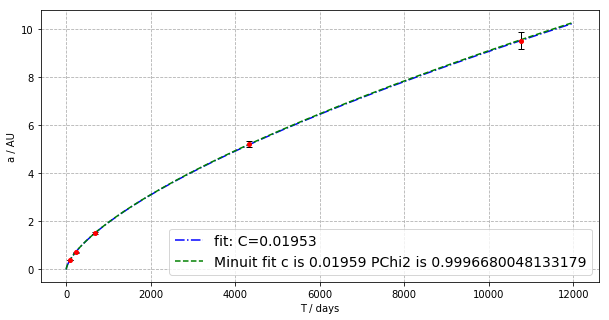

In [455]:
plt.figure(figsize=(10, 5))
day_data = np.array([87.77, 224.7, 686.95, 4332.62, 10759.2])
a_data = np.array([0.389, 0.724, 1.524, 5.2, 9.51])
error_a = np.array([0.011, 0.02, 0.037, 0.13, 0.34])

def kepler_func(x, c):
    return c * x ** (2/3) 

kepler_chi2 = Chi2Regression(kepler_func, day_data, a_data, error_a)
kepler_minuit = Minuit(kepler_chi2, pedantic=False, c=0.01)
kepler_minuit.migrad()
chi2_kepler_minuit = kepler_minuit.fval
Ndof_kepler = 5 - 1
cfit = kepler_minuit.values['c']

popt_k, pcov_k = opt.curve_fit(kepler_func, day_data, a_data)
plt.plot(np.linspace(0,12000,1000), kepler_func(np.linspace(0,12000, 1000), *popt_k), 'b-.',
         label='fit: C=%5.5f' % tuple(popt_k))
plt.plot(np.linspace(0,12000,1000), kepler_func(np.linspace(0,12000, 1000), cfit), linestyle='--', c='g',
                                               label='Minuit fit c is '+str(cfit)[:7]+' PChi2 is '+str(stats.chi2.sf(chi2_kepler_minuit, Ndof_kepler)))
plt.grid(linestyle='--')
plt.xlabel('T / days')
plt.ylabel('a / AU')
plt.legend(prop={'size': 14})
plt.errorbar(day_data, a_data, error_a, fmt='ro', ecolor='k', elinewidth=1, capsize=3, capthick=1, markersize=4)

In [413]:
print('The deviation in the unit of their own uncertainty are individually:\n ', abs(a_data - kepler_func(day_data, popt[0]))/error_a)
print('\nTherefore, the first planet, Mercury, deviates the most but not critical')

The deviation in the unit of their own uncertainty are individually:
  [0.30456961 0.11436459 0.10159947 0.08041491 0.01944243]

Therefore, the first planet, Mercury, deviates the most but not critical


In [435]:
def mass_cal(C, G):
    return 4 * np.pi ** 2 * C**3 / G

c_convert = popt_k[0]*149597870700/(86400**(2/3))
mass = mass_cal(c_convert, 7.5*1e-11)
e_mass = np.sqrt((-4*np.pi**2*c_convert**3 /(7.5*1e-11)**2)**2 * 1e-11 ** 2 + (12 * np.pi**2 * c_convert**2/(7.5*1e-11)) ** 2 *pcov[0,0]**2)
print('solar mass is: ', np.around(mass, -25), '+/-', np.around(e_mass, -26), 'kg')

solar mass is:  1.75766e+30 +/- 2.344e+29 kg


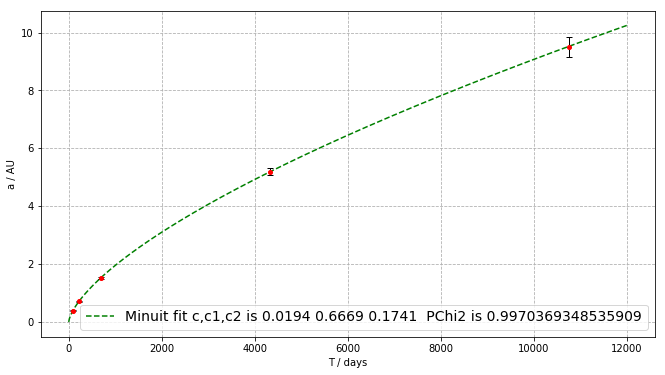

In [698]:
def expand_kepler(t, c, c1, c2):
    return c * (t ** c1 + c2)

plt.figure(figsize=(11, 6))
exkepler_chi2 = Chi2Regression(expand_kepler, day_data, a_data, error_a)
exkepler_minuit = Minuit(exkepler_chi2, pedantic=False, c=0.01, c1=0.01, c2=0.01)
exkepler_minuit.migrad()
chi2_exkepler_minuit = exkepler_minuit.fval
Ndof_exkepler = 5 - 3
exc_fit, exc1_fit, exc2_fit = exkepler_minuit.values['c'], exkepler_minuit.values['c1'], exkepler_minuit.values['c2']
plt.plot(np.linspace(0,12000,1000), expand_kepler(np.linspace(0,12000, 1000), exc_fit, exc1_fit, exc2_fit), linestyle='--', c='g',
                                               label='Minuit fit c,c1,c2 is '+str(exc_fit)[:6]+' '+str(exc1_fit)[:6]+' '+str(exc2_fit)[:6]+' '
                                                +' PChi2 is '+str(stats.chi2.sf(chi2_exkepler_minuit, Ndof_exkepler)))
plt.grid(linestyle='--')
plt.xlabel('T / days')
plt.ylabel('a / AU')
plt.legend(prop={'size': 14})
plt.errorbar(day_data, a_data, error_a, fmt='ro', ecolor='k', elinewidth=1, capsize=3, capthick=1, markersize=4)
plt.show()

In [697]:
print('The deviation in the unit of their own uncertainty are individually:\n ', abs(a_data - expand_kepler(day_data, exc_fit, exc1_fit, exc2_fit))/error_a)

The deviation in the unit of their own uncertainty are individually:
  [0.01678535 0.04205357 0.01402375 0.04075394 0.04502363]


This formula match slightly better except for the last planet. However, from my perspective, the addition of this two parameters is not necessary since the chi2 probability doesn't really change much (say the simple formula's chi2 probability is high enough). Therefore, no need to add these two parameters before we get more datapoint.

**5.2** 
(15 points) Searching for slow moving (compared to speed of light) particles at CERN’s LHC
accelerator, you are calibrating the speed measurement β = v/c of the candidate particles, using
a control sample of particles known to (effectively) travel at the speed of light, i.e. β = 1.
The file www.nbi.dk/∼petersen/data BetaCalibration.txt contains 4000 control sample
measurements of initial speed estimate (βinit), energy (E) in GeV, angle with respect to the beam
axis (θ) in radians, and time since start of experiment (T) in seconds, respectively.
• What is the resolution of βinit? And is it consistent with a Gaussian distribution?
• Is the distribution in θ consistent with being symmetric around π/2?
• Test if the mean of βinit is constant as a function of energy.
• Due to shifts in timing, the central value of βinit shifted with time T, smearing the resolution.
Calibrate βinit with respect to T and determine the obtained resolution on $\beta_{T-calib}$.
• Using all information available, what is the best calibration of β you can produce?

In [699]:
beta_data = np.loadtxt('data_BetaCalibration.txt')
from scipy.spatial import distance_matrix
beta_ini = beta_data[:,0]
beta_dismat = abs(-beta_ini[:,np.newaxis] + beta_ini[np.newaxis, :])
beta_dismat = np.where(beta_dismat!=0.0, beta_dismat, beta_dismat+2)
print('The distance matrix is:\n', beta_dismat)
beta_dis_min = np.amin(beta_dismat)
print('\nFrom the distance matrix, we can see the resolution is :', np.around(beta_dis_min,6))

The distance matrix is:
 [[2.000e+00 1.243e-01 1.520e-02 ... 7.360e-02 1.380e-02 6.380e-02]
 [1.243e-01 2.000e+00 1.091e-01 ... 5.070e-02 1.105e-01 6.050e-02]
 [1.520e-02 1.091e-01 2.000e+00 ... 5.840e-02 1.400e-03 4.860e-02]
 ...
 [7.360e-02 5.070e-02 5.840e-02 ... 2.000e+00 5.980e-02 9.800e-03]
 [1.380e-02 1.105e-01 1.400e-03 ... 5.980e-02 2.000e+00 5.000e-02]
 [6.380e-02 6.050e-02 4.860e-02 ... 9.800e-03 5.000e-02 2.000e+00]]

From the distance matrix, we can see the resolution is : 0.0001


The original chi2 is:  12156.402657186032
The dof is:  97
Pchi2 is:  0.0
98.00228381923988 1.0433759626573496


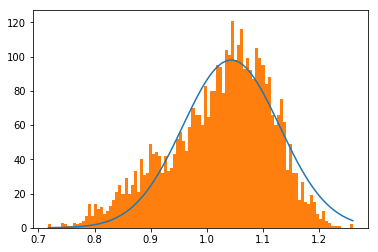

Not consistent with Gaussian distribution


In [532]:
beta_hist = np.histogram(beta_ini, 100)
chi2_beta_object = Chi2Regression(gaussian_fit, (beta_hist[1][:-1]+beta_hist[1][1:])/2, beta_hist[0])

beta_minuit = Minuit(chi2_beta_object, pedantic=False, a=90, x0=1, sigma=0.5)
beta_minuit.migrad()
chi2_beta_minuit = beta_minuit.fval
N_beta_dof = 100-3
print('The original chi2 is: ', chi2_beta_minuit)
print('The dof is: ', N_beta_dof)
print('Pchi2 is: ', stats.chi2.sf(chi2_beta_minuit, N_beta_dof))

a_beta_fit = beta_minuit.values['a']
x0_beta_fit = beta_minuit.values['x0']
sig_beta_fit = beta_minuit.values['sigma']

x_beta_fit = np.linspace(np.min(beta_ini), np.max(beta_ini), 1000)
gaussian_beta_fit = gaussian_fit(x_beta_fit,a_beta_fit, x0_beta_fit,sig_beta_fit)
print(a_beta_fit, x0_beta_fit)
plt.plot(x_beta_fit, gaussian_beta_fit)
plt.hist(beta_ini, 100)
plt.show()
print('Not consistent with Gaussian distribution')

The skewness of theta is : -0.016267892096180927
The average value is:  1.5755733749999998
Where diff between pi/2 and avg is:  0.004777048205103274
Therefore, we can safely say that the angle is symmetric along pi/2 axis


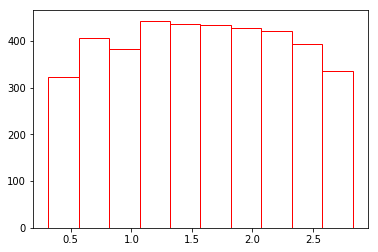

In [704]:
theta_data = beta_data[:,1]
plt.hist(theta_data, fill=False, edgecolor='red')
print('The skewness of theta is :', stats.skew(theta_data))
print('The average value is: ', np.average(theta_data))
print('Where diff between pi/2 and avg is: ', np.average(theta_data)-np.pi/2)
print('Therefore, we can safely say that the angle is symmetric along pi/2 axis')

In [556]:
print('Use covariance matrix to do the test\n')
cov_e_beta = np.cov(beta_data[:,2], beta_ini)
print(cov_e_beta)
print('\nThe C_{01} of cov matrix shows that the correlation between beta ini and energy is negative. Therefore, we can say that the two variables are to some extend, negative correlation')
print('Hence, beta is not constant as function of energy')

Use covariance matrix to do the test

[[ 2.47393707e+02 -4.33266321e-01]
 [-4.33266321e-01  8.30866730e-03]]

The C_{01} of cov matrix shows that the correlation between beta ini and energy is negative. Therefore, we can say that the two variables are to some extend, negative correlation



Use convolution to test the variance of beta under the evolution of T
Since there is a huge gap at around 2000s, we treat the two intervals seperately
The resolution is approximately 0.06
STD of first interval is:  0.07607709230262494
STD of second interval is:  0.05489481606947909


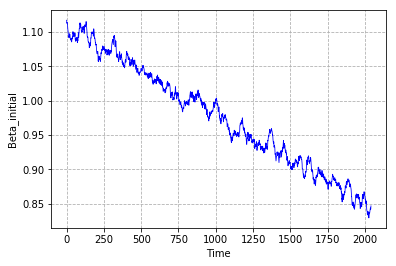

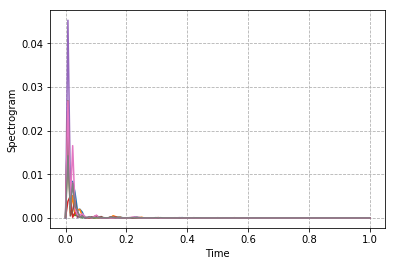

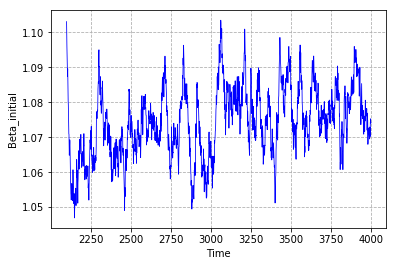

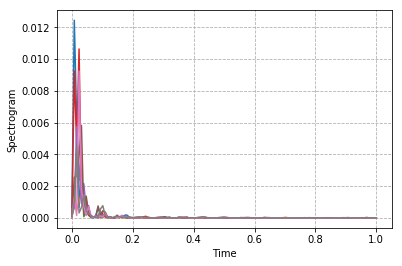

In [689]:
from scipy.ndimage import uniform_filter1d
from scipy.signal import spectrogram
print('Use convolution to test the variance of beta under the evolution of T')
print('Since there is a huge gap at around 2000s, we treat the two intervals seperately')
beta_con10 = uniform_filter1d(beta_ini[:2040], 30, mode='nearest')
time_beta = np.linspace(0, 2040, len(beta_con10))
plt.plot(time_beta, beta_con10, c='b', linewidth=0.8)
plt.grid(linestyle='--')
plt.ylabel('Beta_initial')
plt.xlabel('Time')
plt.figure()
print('The resolution is approximately 0.06')
x_spec = (np.linspace(0, 1, len(spectrogram(beta_con10)[2])))
plt.plot(x_spec, spectrogram(beta_con10)[2])
plt.grid(linestyle='--')
plt.xlabel('Time')
plt.ylabel('Spectrogram')
print('STD of first interval is: ', np.std(beta_con10))

plt.figure()
beta_con11 = uniform_filter1d(beta_ini[2100:4000], 30, mode='nearest')
time_beta = np.linspace(2100, 4000, len(beta_con11))
plt.plot(time_beta, beta_con11, c='b', linewidth=0.8)
plt.grid(linestyle='--')
plt.ylabel('Beta_initial')
plt.xlabel('Time')
plt.figure()
plt.grid(linestyle='--')
x_spec = (np.linspace(0, 1, len(spectrogram(beta_con11)[2])))
plt.plot(x_spec, spectrogram(beta_con11)[2])
plt.xlabel('Time')
plt.ylabel('Spectrogram')
print('STD of second interval is: ',np.std(beta_ini[2100:4000]))

plt.show()

In [716]:
print('TAT')

TAT
